# synpuf disclosure risk - 100% syntheses

Compare synthetic PUFs trained from a 100% samples, comparing the nearest with the 2nd-nearest training records.

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import synthimpute as si
from scipy import stats

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

**UPDATE!**

In [15]:
IDS = [19, 20]
NAMES = ['CART', 'RF']

In [16]:
PUF_SAMPLE_DIR = '~/Downloads/puf/'
SYN_DIR = '~/Downloads/'
NEAREST_DIR = '~/Downloads/'

### Graphing

In [17]:
# !wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# mpl.font_manager._rebuild()

In [18]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Load data

In [19]:
nearest_list = []

for i in np.arange(len(IDS)):
    tmp = pd.read_csv(NEAREST_DIR + 'nearest' + str(IDS[i]) + '.csv')
    tmp['model'] = NAMES[i]
    nearest_list.append(tmp)
    
nearest = pd.concat(nearest_list)

## Charts

In [20]:
distances_stacked = nearest[['model', 'dist1', 'dist2', 'dist3']].melt(id_vars='model')
distances_stacked.columns = ['model', 'type', 'dist']
distances_stacked['type'] = distances_stacked.type.map(lambda x: x.replace('_dist', ''))

In [21]:
median_distance = distances_stacked.pivot_table(aggfunc=np.median, 
                                                columns='type', index='model').dist
# median_distance['train_test_ratio'] = median_distance.train / median_distance.test
median_distance.loc[NAMES]

type,dist1,dist2,dist3
model,,,
CART,0.221509,0.290681,0.336787
RF,0.147468,0.234045,0.277552


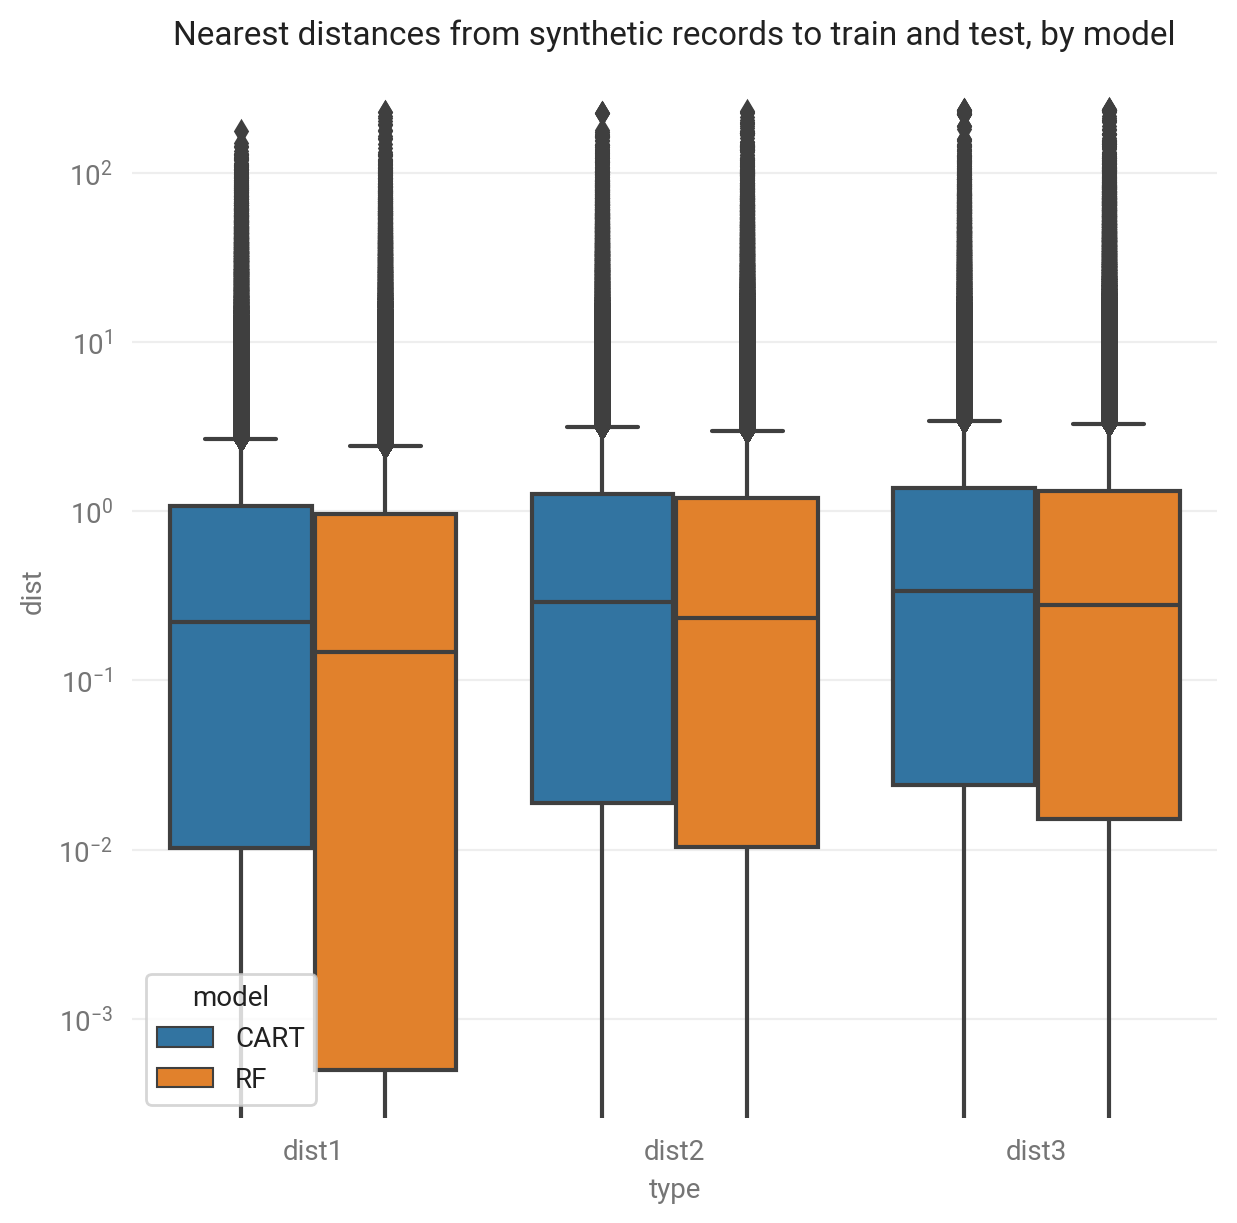

In [22]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='type', y='dist',
            hue='model', data=distances_stacked)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.title('Nearest distances from synthetic records to train and test, by model')
plt.show()

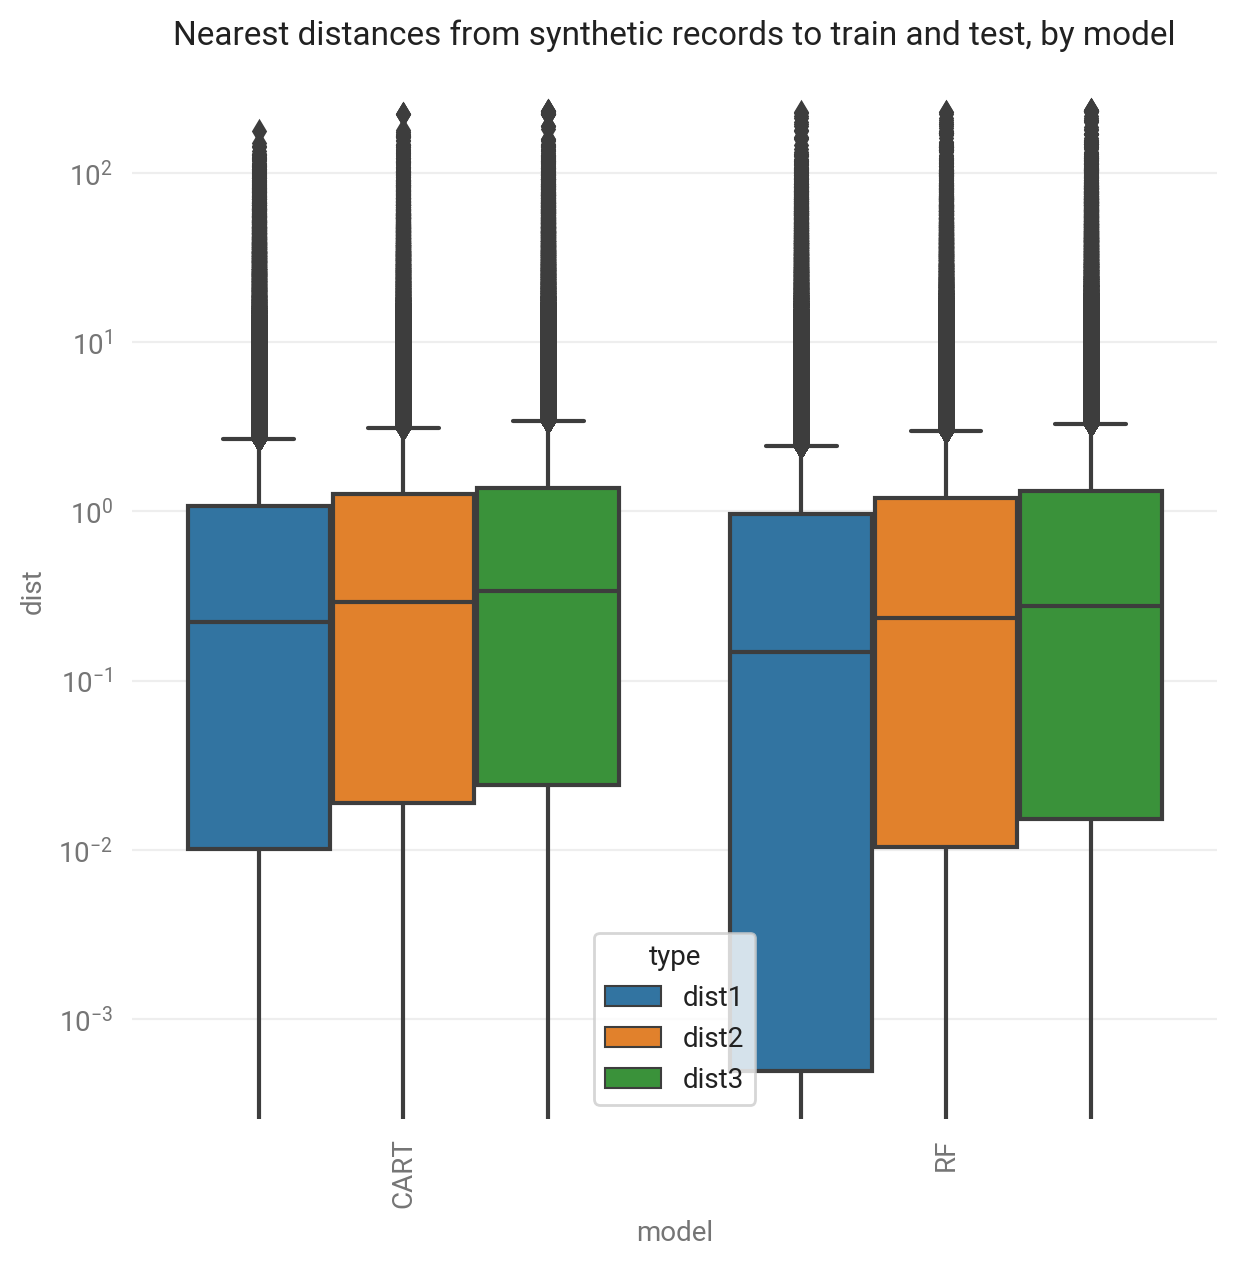

In [23]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='model', y='dist',
            hue='type', data=distances_stacked)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.xticks(rotation=90)
plt.title('Nearest distances from synthetic records to train and test, by model')
plt.show()

### Exact matches

In [12]:
nearest['exact_match1'] = nearest.dist1 == 0
nearest['exact_match2'] = nearest.dist2 == 0
nearest['exact_match3'] = nearest.dist3 == 0

In [13]:
nearest[['model', 'exact_match1', 'exact_match2', 'exact_match3']].pivot_table(
    index='model').loc[NAMES]

,exact_match1,exact_match2,exact_match3
model,,,
Sparse RF,0.004066,0.001799,0.001381
CART,0.088743,0.068970,0.058162
RF,0.163876,0.080129,0.062060


In [14]:
exact_matches_bool = nearest[['model', 'exact_match1', 
                              'exact_match2', 'exact_match3']].melt(id_vars='model')
exact_matches_bool.columns = ['model', 'type', 'share_exact']
exact_matches_bool['type'] = exact_matches_bool.type.map(lambda x: x.replace('exact_match_', ''))

/home/maxghenis/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


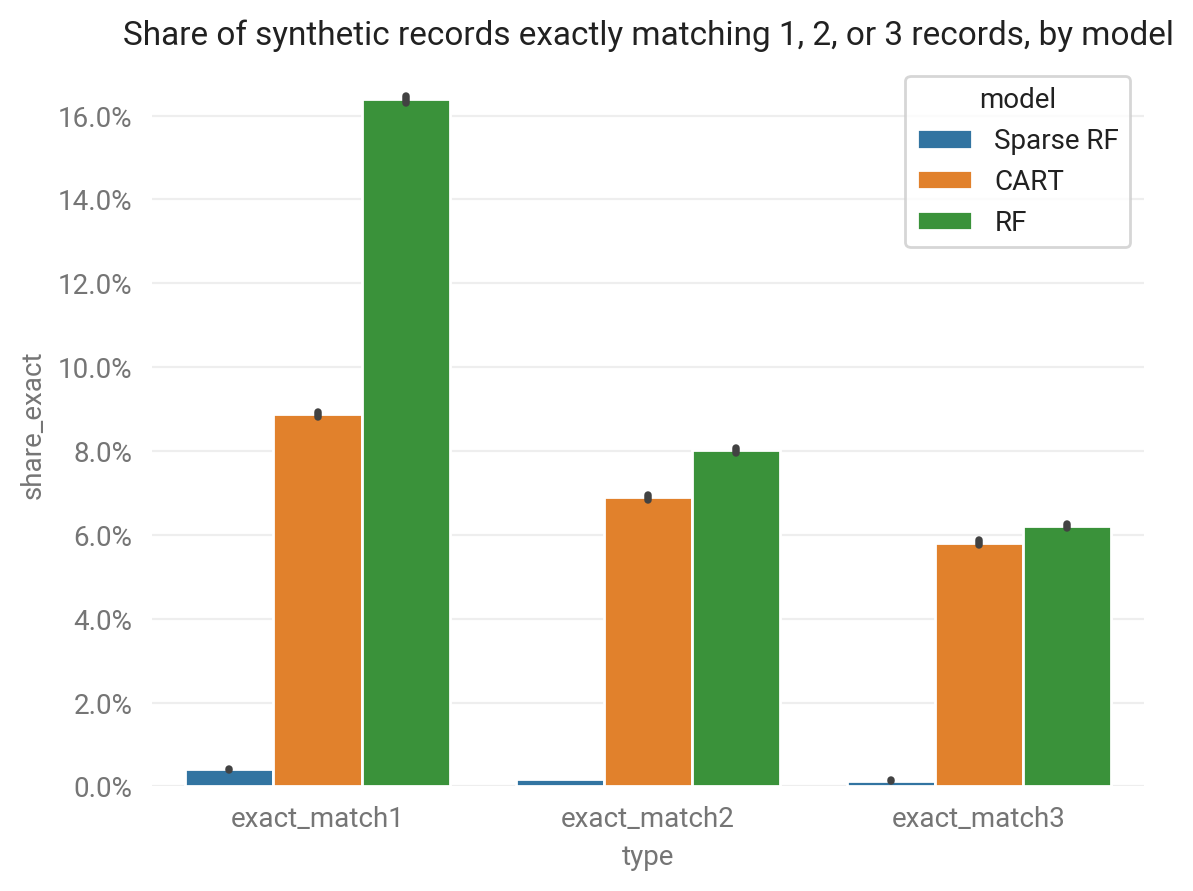

In [15]:
ax = sns.barplot(x='type', y='share_exact', hue='model', data=exact_matches_bool)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.1%}'.format(y)))
plt.title('Share of synthetic records exactly matching 1, 2, or 3 records, by model')
plt.show()

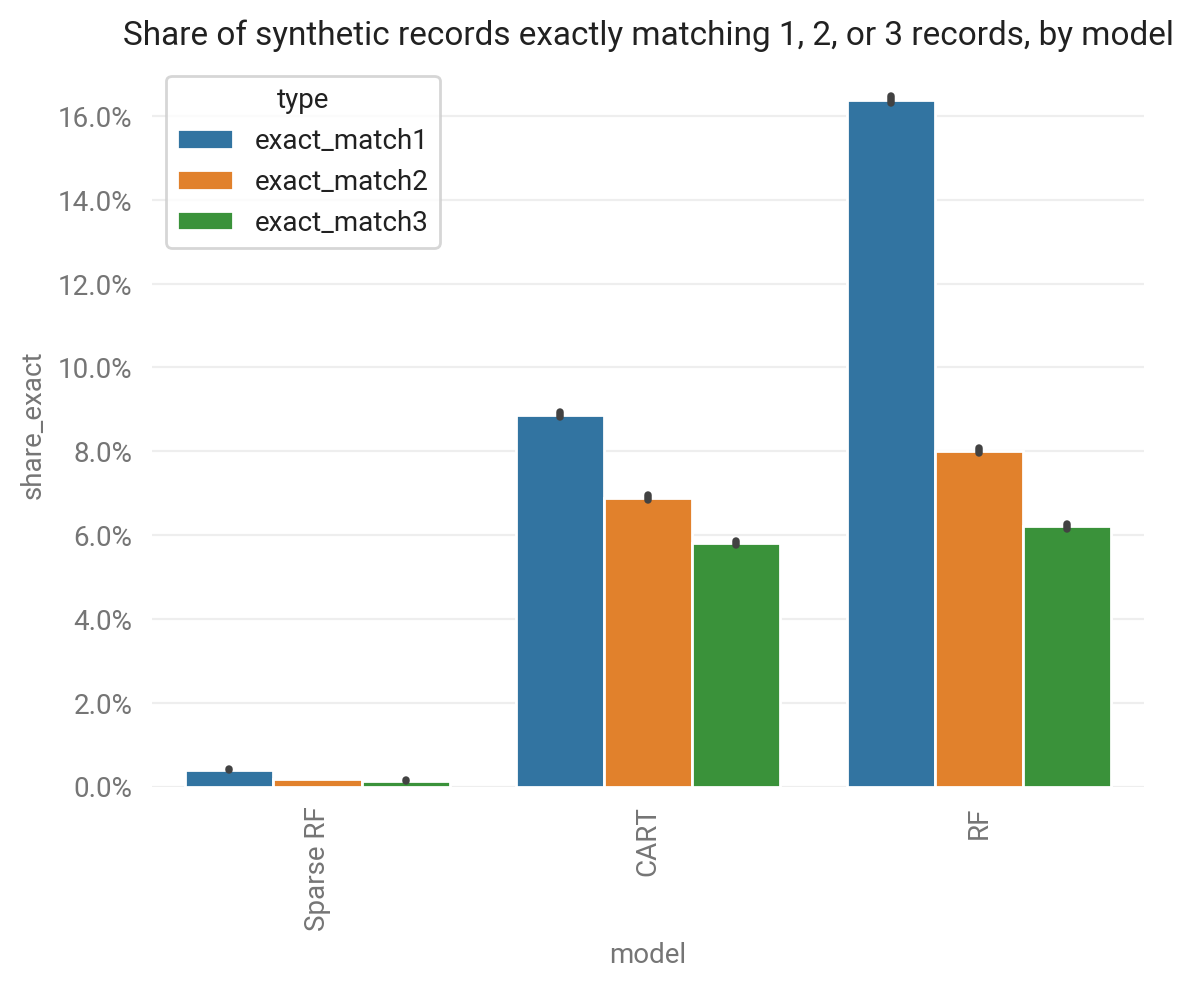

In [16]:
ax = sns.barplot(x='model', y='share_exact', hue='type', data=exact_matches_bool)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.1%}'.format(y)))
plt.xticks(rotation=90)
plt.title('Share of synthetic records exactly matching 1, 2, or 3 records, by model')
plt.show()

### Share of exact matches duplicated in the true file

In [17]:
exact_matches1 = nearest[nearest.exact_match1][['model', 'exact_match2', 'exact_match3']].melt('model')

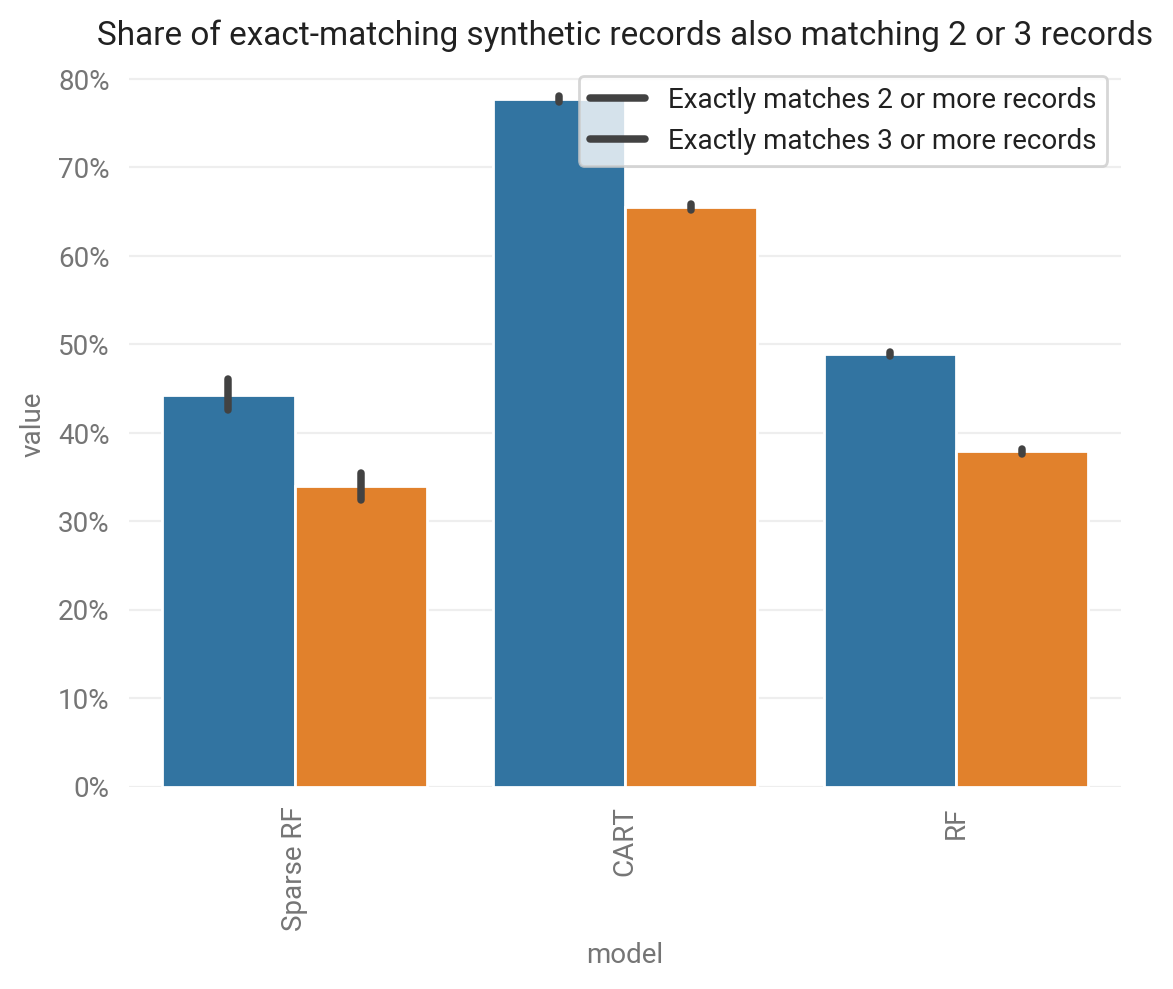

In [18]:
ax = sns.barplot(x='model', y='value', hue='variable', data=exact_matches1)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=90)
plt.title('Share of exact-matching synthetic records also matching 2 or 3 records')
# TODO: Fix
plt.legend(['Exactly matches 2 or more records', 'Exactly matches 3 or more records'])
plt.show()